In [165]:
import matplotlib.pyplot as plt
import torch
curves2 = []
import glob
curves2 = [torch.load(f) for f in glob.glob("results/affine_3x3_manyruns*/curves.trch")]

plt.rcParams["figure.figsize"] = (6,4)

make_matrix_stepXXone_step
make_matrix_stepXXtwo_step
make_matrix_stepXXtwo_step_consistent
make_exp_stepXXone_step
make_exp_stepXXtwo_step
make_exp_stepXXtwo_step_consistent
make_consistent_stepXXone_step
make_consistent_stepXXtwo_step
make_consistent_stepXXtwo_step_consistent


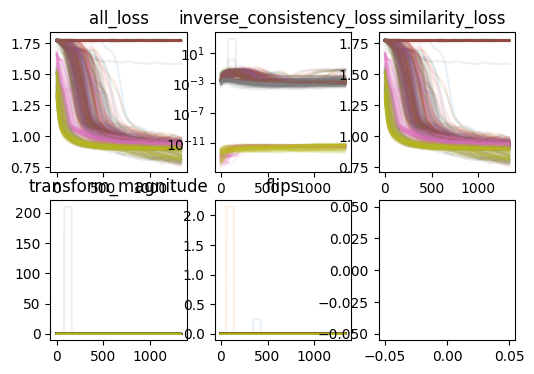

In [166]:
experiments = list(curves2[0].keys())
for j, experiment_name in enumerate(experiments):
    for i, metric_name in enumerate(curves2[0][experiments[0]][0]._fields):

        plt.subplot(2, 3, i + 1)
        for curves in curves2:


                prop_cycle = plt.rcParams['axes.prop_cycle']
                colors = prop_cycle.by_key()['color']
                color = colors[j]
                data = torch.tensor([getattr(val,metric_name) for val in curves[experiment_name]])
                data = torch.nn.functional.conv1d(data[None], torch.ones((1, 1, 80)) / 80)[0]

                plt.plot(data, c=color, alpha=.1)

        if metric_name == "inverse_consistency_loss":
            plt.yscale("log")





        plt.title(metric_name)
    plt.subplot(2, 3, 6)
    plt.plot([[0 for y in experiment_name]])
    #plt.legend([e[5:].split("_stepXX")[0] +" " +e.split("XX")[1] for e in experiments])
    print(experiment_name)
plt.show()



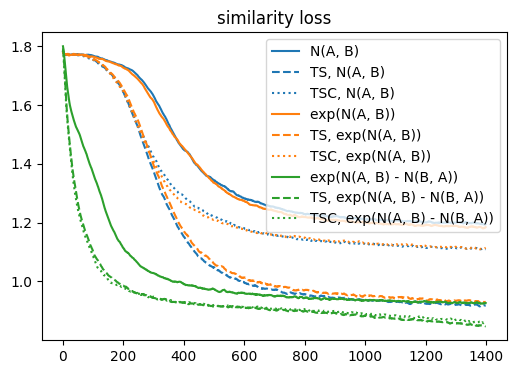

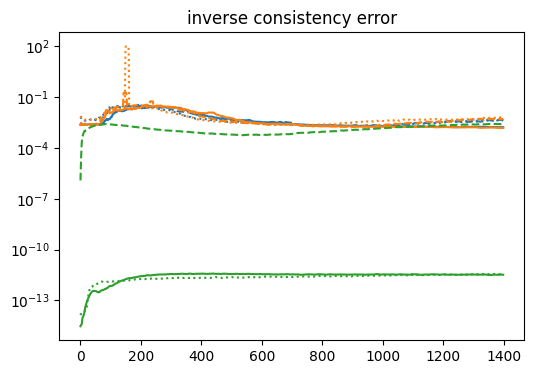

In [167]:
experiments = list(curves2[0].keys())
#for i, metric_name in enumerate(curves2[0][experiments[0]][0]._fields):

line_styles = ["solid", "dashed", "dotted"]
for i, metric_name in ((0, "similarity_loss"), (1, "inverse_consistency_loss")):
    
    
    if metric_name != "flips":
        
        for j, experiment_name in enumerate(experiments):

            prop_cycle = plt.rcParams['axes.prop_cycle']
            colors = prop_cycle.by_key()['color']
            color = colors[j // 3]

            ddata = torch.tensor([0])

            for curves in curves2:

                data = torch.tensor([getattr(val,metric_name) for val in curves[experiment_name]])
                data = torch.nn.functional.conv1d(data[None], torch.ones((1, 1, 11)) / 11)[0]

                ddata = data + ddata
            ddata = ddata / len(curves2)
            
            #if "matrix" in experiment_name or "exp" in experiment_name:
            #    ddata = ddata[::2]
            #else:
            #    ddata = ddata[:len(ddata) // 2]

            plt.plot(ddata, c=color, linestyle=line_styles[j % 3])

        if metric_name == "inverse_consistency_loss":
            plt.yscale("log")
            metric_name = "inverse_consistency_error"

        plt.title(metric_name.replace("_", " "))
        
        if i == 0:
            #plt.legend([("direct" if "matrix" in e[5:].split("_stepXX")[0] else e[5:].split("_stepXX")[0]) +" " +e.split("XX")[1] for e in experiments])
            plt.legend(["N(A, B)", "TS, N(A, B)", "TSC, N(A, B)", "exp(N(A, B))", "TS, exp(N(A, B))", "TSC, exp(N(A, B))",
                        "exp(N(A, B) - N(B, A))", "TS, exp(N(A, B) - N(B, A))", "TSC, exp(N(A, B) - N(B, A))"])
            plt.savefig("affine_3x3_paperfig_sim.pdf", bbox_inches='tight')
            plt.show()
            plt.clf()
        else:
            plt.savefig("affine_3x3_paperfig_inverse.pdf", bbox_inches='tight')




#plt.subplot(1, 3, 3)
#plt.xticks([])
#plt.yticks([])

#for j in range(9):
#    plt.plot([0], c=colors[j // 3], linestyle=line_styles[j % 3])
#plt.box(False)


In [168]:
plt.plot?

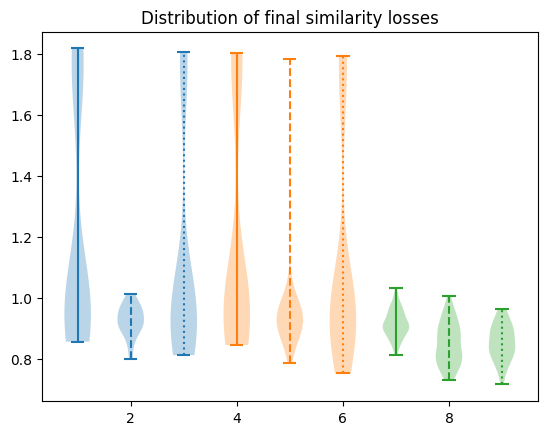

In [162]:
experiments = list(curves2[0].keys())
metric_name = "similarity_loss"

dddata = []
for j, experiment_name in enumerate(experiments):

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    color = colors[j]

    ddata = []

    for curves in curves2:

        data = [getattr(val,metric_name) for val in curves[experiment_name]][-1]

        ddata.append(data)

    dddata.append(ddata)

violin_plot = plt.violinplot(dddata, bw_method="silverman")
if metric_name == "inverse_consistency_loss":
    plt.yscale("log")
    metric_name = "inverse_consistency_error"

plt.title("Distribution of final similarity losses")

hatches = [None, "-", "."]

for i, pc in enumerate(violin_plot["bodies"]):

    pc.set_facecolor(colors[i // 3])
    
    #if hatches[i % 3]:
    #    pc.set_hatch(hatches[i % 3])
    #    pc.set_edgecolor(colors[i // 3])
    

violin_plot["cbars"].set_linestyles(line_styles * 3)

violin_plot["cbars"].set_colors([colors[i // 3] for i in range(9)])
violin_plot["cmins"].set_colors([colors[i // 3] for i in range(9)])
violin_plot["cmaxes"].set_colors([colors[i // 3] for i in range(9)])

plt.savefig("affine_3x3_violin.pdf", bbox_inches='tight')

In [159]:
len(curves2)

65

In [76]:
import seaborn as sns

In [148]:
violin_plot["cbars"].set_linestyles

AttributeError: 'dict' object has no attribute 'cbars'

In [139]:
violin_plot["cbars"].get_segments()

[array([[1.        , 0.85766429],
        [1.        , 1.81704605]]),
 array([[2.        , 0.80141193],
        [2.        , 1.01308727]]),
 array([[3.        , 0.81337953],
        [3.        , 1.80573034]]),
 array([[4.        , 0.84662658],
        [4.        , 1.80146754]]),
 array([[5.        , 0.78694385],
        [5.        , 1.78308725]]),
 array([[6.        , 0.75351697],
        [6.        , 1.79198289]]),
 array([[7.        , 0.81270558],
        [7.        , 1.03283429]]),
 array([[8.        , 0.73068774],
        [8.        , 1.00551713]]),
 array([[9.        , 0.71732056],
        [9.        , 0.96395838]])]

In [141]:
pc.set_hatch?